In [2]:
import netCDF4 as nc

# 打开下载的nc文件
file_path = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 替换为你的nc文件路径
dataset = nc.Dataset(file_path, 'r')

# 输出文件的基本信息
print(f"文件名: {file_path}")
print(f"NetCDF版本: {dataset.file_format}")

# 输出文件中的维度（Dimensions）
dimensions = dataset.dimensions.keys()
print("\nDimensions:")
for dim in dimensions:
    print(f"  {dim}: {dataset.dimensions[dim].size}")

# 输出文件中的变量（Variables）
variables = dataset.variables.keys()
print("\nVariables:")
for var in variables:
    print(f"  {var}: {dataset.variables[var].dimensions}")
    print(f"    类型: {dataset.variables[var].datatype}")
    # 输出变量的属性（Attributes）
    attributes = dataset.variables[var].ncattrs()
    print(f"    属性:")
    for attr in attributes:
        print(f"      {attr}: {getattr(dataset.variables[var], attr)}")

# 关闭文件
dataset.close()

文件名: E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc
NetCDF版本: NETCDF4

Dimensions:
  time: 4464

Variables:
  time: ('time',)
    类型: float64
    属性:
      standard_name: time
      long_name: Time of measurement
      units: seconds since 1970-01-01 00:00:00 UTC
      axis: T
      comment: End of the 10 minute sampling period
      calendar: standard
  latitude: ('time',)
    类型: float64
    属性:
      standard_name: latitude
      units: degree_north
      valid_min: -90.0
      valid_max: 90.0
  longitude: ('time',)
    类型: float64
    属性:
      standard_name: longitude
      units: degree_east
      valid_min: -180.0
      valid_max: 180.0
  Hm0: ('time',)
    类型: float32
    属性:
      _FillValue: 9999.0
      standard_name: sea_surface_wave_significant_height
      long_name: Significant wave height estimate from spectrum
      units: m
      valid_range: [ 0. 25.]
  hm0a: ('time',)
    类型: float32
    属性:
      _FillValue: 9999.0
      standard_name: sea_surface_wave_signi

In [3]:
import netCDF4 as nc
import numpy as np
from datetime import timedelta, datetime

# 打开NetCDF文件
file_path = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 请确保路径正确
dataset = nc.Dataset(file_path, 'r')

# 查找时间变量
time_var_name = None
for var_name in dataset.variables.keys():
    if 'time' in var_name.lower():  # 假设时间变量名中包含'time'
        time_var_name = var_name
        break

if time_var_name is None:
    raise ValueError("没有找到时间变量")

# 读取时间变量
time_var = dataset.variables[time_var_name]
time_units = time_var.getncattr('units')  # 获取时间单位
time_data = time_var[:]  # 读取时间数据

# 解析时间单位并转换为datetime对象（这取决于时间单位的格式）
# 假设时间单位是'hours since 0001-01-01 00:00:00.0'或类似的格式
# 这里我们使用numpy的datetime64功能来解析时间（注意：这可能需要根据实际的units字符串进行调整）
# 但是，对于NetCDF时间变量，通常使用netCDF4的num2date函数更为方便
from netCDF4 import num2date

# 获取时间数据的起始和结束索引
start_index = 0
end_index = len(time_data) - 1

# 将起始和结束时间从数值转换为datetime对象
start_time = num2date(time_data[start_index], units=time_units, calendar=time_var.calendar)
end_time = num2date(time_data[end_index], units=time_units, calendar=time_var.calendar)

# 输出时间跨度
time_span = end_time - start_time
print(f"时间跨度: {time_span}")

# 如果您想要以更易读的格式输出起始和结束时间
print(f"起始时间: {start_time}")
print(f"结束时间: {end_time}")

# 关闭NetCDF文件
dataset.close()

时间跨度: 30 days, 23:50:00
起始时间: 2020-01-01 00:00:00
结束时间: 2020-01-31 23:50:00


In [5]:
# 查找纬度和经度变量
lat_var_name = None
lon_var_name = None
for var_name in dataset.variables.keys():
    if 'latitude' in var_name.lower():  # 假设纬度变量名中包含'lat'
        lat_var_name = var_name
    elif 'longitude' in var_name.lower() or 'long' in var_name.lower():  # 假设经度变量名中包含'lon'或'long'
        lon_var_name = var_name

if lat_var_name is None or lon_var_name is None:
    raise ValueError("没有找到纬度或经度变量")

# 读取纬度和经度数据
lat_var = dataset.variables[lat_var_name]
lon_var = dataset.variables[lon_var_name]

# 获取纬度和经度的范围
lat_min = lat_var.min()
lat_max = lat_var.max()
lon_min = lon_var.min()
lon_max = lon_var.max()

# 输出经纬度范围
print(f"纬度范围: {lat_min}° 到 {lat_max}°")
print(f"经度范围: {lon_min}° 到 {lon_max}°")

# 关闭NetCDF文件
dataset.close()

AttributeError: NetCDF: Not a valid ID

In [6]:
import netCDF4 as nc

# 打开NetCDF文件
 # 请确保路径正确
try:
    dataset = nc.Dataset(file_path, 'r')
    print("可用的变量名:", dataset.variables.keys())  # 打印所有变量名

    # 查找纬度和经度变量
    lat_var_name = None
    lon_var_name = None
    for var_name in dataset.variables.keys():
        if 'lat' in var_name.lower():  # 假设纬度变量名中包含'lat'
            lat_var_name = var_name
        elif 'lon' in var_name.lower() or 'long' in var_name.lower():  # 假设经度变量名中包含'lon'或'long'
            lon_var_name = var_name

    if lat_var_name is None or lon_var_name is None:
        raise ValueError("没有找到纬度或经度变量")

    # 读取纬度和经度数据
    lat_var = dataset.variables[lat_var_name]
    lon_var = dataset.variables[lon_var_name]

    # 检查变量类型
    print("纬度变量类型:", type(lat_var))
    print("经度变量类型:", type(lon_var))

    # 尝试获取纬度和经度的范围（这里可能需要额外的错误处理）
    try:
        lat_min = lat_var[:].min()  # 注意这里的[:]用于获取数据数组
        lat_max = lat_var[:].max()
        lon_min = lon_var[:].min()
        lon_max = lon_var[:].max()

        # 输出经纬度范围
        print(f"纬度范围: {lat_min}° 到 {lat_max}°")
        print(f"经度范围: {lon_min}° 到 {lon_max}°")
    except Exception as e:
        print("在获取经纬度范围时出错:", e)

finally:
    # 关闭NetCDF文件
    dataset.close()

可用的变量名: dict_keys(['time', 'latitude', 'longitude', 'Hm0', 'hm0a', 'hm0b', 'hmax', 'tm02', 'tm02a', 'tm02b', 'tp', 'thmax', 'tm01', 'thhf', 'mdir', 'mdira', 'mdirb', 'thtp', 'sprtp'])
纬度变量类型: <class 'netCDF4._netCDF4.Variable'>
经度变量类型: <class 'netCDF4._netCDF4.Variable'>
纬度范围: 62.38923073° 到 62.39497185°
经度范围: 6.04452133° 到 6.05487823°


In [7]:
import netCDF4 as nc
# 打开下载的nc文件
file_path = r'E:\Dataset\met_waves\202001_E39_C1_Sulafjorden_wave.nc'  # 替换为你的nc文件路径
dataset = nc.Dataset(file_path, 'r')
# 打开NetCDF文件
 # 请确保路径正确
try:
    dataset = nc.Dataset(file_path, 'r')
    print("可用的变量名:", dataset.variables.keys())  # 打印所有变量名

    # 查找纬度和经度变量
    lat_var_name = None
    lon_var_name = None
    for var_name in dataset.variables.keys():
        if 'lat' in var_name.lower():  # 假设纬度变量名中包含'lat'
            lat_var_name = var_name
        elif 'lon' in var_name.lower() or 'long' in var_name.lower():  # 假设经度变量名中包含'lon'或'long'
            lon_var_name = var_name

    if lat_var_name is None or lon_var_name is None:
        raise ValueError("没有找到纬度或经度变量")

    # 读取纬度和经度数据
    lat_var = dataset.variables[lat_var_name]
    lon_var = dataset.variables[lon_var_name]

    # 检查变量类型
    print("纬度变量类型:", type(lat_var))
    print("经度变量类型:", type(lon_var))

    # 尝试获取纬度和经度的范围（这里可能需要额外的错误处理）
    try:
        lat_min = lat_var[:].min()  # 注意这里的[:]用于获取数据数组
        lat_max = lat_var[:].max()
        lon_min = lon_var[:].min()
        lon_max = lon_var[:].max()

        # 输出经纬度范围
        print(f"纬度范围: {lat_min}° 到 {lat_max}°")
        print(f"经度范围: {lon_min}° 到 {lon_max}°")
    except Exception as e:
        print("在获取经纬度范围时出错:", e)

finally:
    # 关闭NetCDF文件
    dataset.close()

可用的变量名: dict_keys(['time', 'latitude', 'longitude', 'Hm0', 'hm0a', 'hm0b', 'hmax', 'tm02', 'tm02a', 'tm02b', 'tp', 'thmax', 'tm01', 'thhf', 'mdir', 'mdira', 'mdirb', 'thtp', 'sprtp'])
纬度变量类型: <class 'netCDF4._netCDF4.Variable'>
经度变量类型: <class 'netCDF4._netCDF4.Variable'>
纬度范围: 62.39447594° 到 62.39890099°
经度范围: 6.0417366° 到 6.04974747°


In [7]:
import xarray as xr

# 打开NetCDF文件
ds = xr.open_dataset(r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc')

# 获取纬度和经度
lat = ds['latitude'].values
lon = ds['longitude'].values

# 计算分辨率
lat_resolution = abs(lat[1] - lat[0])
lon_resolution = abs(lon[1] - lon[0])

print(f"纬度分辨率: {lat_resolution} 度")
print(f"经度分辨率: {lon_resolution} 度")


纬度分辨率: 9.540000000640703e-06 度
经度分辨率: 0.0001144400000008261 度


In [8]:

# 获取时间数据
time = ds['time']

# 计算时间差
time_diff = time.diff('time')

# 查看时间差的第一个值，即为时间分辨率
time_resolution = time_diff.mean().values

print(f"时间分辨率: {time_resolution}")


时间分辨率: 600000000000 nanoseconds


In [8]:
import netCDF4
import numpy as np

# 定义读取 NetCDF 文件并提取经纬度信息的函数
def get_grid_resolution(nc_file):
    # 打开 NetCDF 文件
    dataset = netCDF4.Dataset(nc_file, 'r')
    
    # 获取经纬度数据
    latitudes = dataset.variables['latitude'][:]
    longitudes = dataset.variables['longitude'][:]
    
    # 计算纬度和经度的最小值、最大值和间隔
    lat_min, lat_max = np.min(latitudes), np.max(latitudes)
    lon_min, lon_max = np.min(longitudes), np.max(longitudes)
    
    lat_res = latitudes[1] - latitudes[0]  # 纬度分辨率
    lon_res = longitudes[1] - longitudes[0]  # 经度分辨率
    
    # 输出结果
    print(f"Latitude Range: {lat_min} to {lat_max}")
    print(f"Longitude Range: {lon_min} to {lon_max}")
    print(f"Latitude Resolution: {lat_res} degrees")
    print(f"Longitude Resolution: {lon_res} degrees")
    
    return lat_res, lon_res

# 你的 NetCDF 文件路径
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 修改为你的文件路径

# 获取并打印网格分辨率
get_grid_resolution(nc_file)


Latitude Range: 62.38923073 to 62.39497185
Longitude Range: 6.04452133 to 6.05487823
Latitude Resolution: 9.540000000640703e-06 degrees
Longitude Resolution: 0.0001144400000008261 degrees


(9.540000000640703e-06, 0.0001144400000008261)

In [9]:
import numpy as np

# 地球半径：111公里，换算成米
earth_radius = 6371  # 地球半径（单位：km）
lat_res_target = 250 / 111000  # 纬度分辨率，单位度
latitude = 62.3  # 假设的纬度（单位：度）

# 计算经度的分辨率
lon_res_target = 250 / (111000 * np.cos(np.radians(latitude)))  # 经度分辨率，单位度

print(f"Target Latitude Resolution: {lat_res_target} degrees")
print(f"Target Longitude Resolution: {lon_res_target} degrees")


Target Latitude Resolution: 0.0022522522522522522 degrees
Target Longitude Resolution: 0.004845199079918266 degrees


In [13]:
import netCDF4

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 获取纬度和经度的数据
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]

# 获取纬度和经度的网格数
num_latitude = len(latitudes)
num_longitude = len(longitudes)

# 输出网格数
total_grids = num_latitude * num_longitude
print(f"Total number of grids: {total_grids} (Latitude: {num_latitude}, Longitude: {num_longitude})")


Total number of grids: 19927296 (Latitude: 4464, Longitude: 4464)


C:\Users\86156\AppData\Local\Temp\ipykernel_23464\1275167684.py:31: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interpolate.interp2d(longitudes, latitudes, original_data, kind='linear', fill_value='extrapolate')
D:\CondaEnvs\torchtmp\lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=71,67 m=4464 fp=7.705

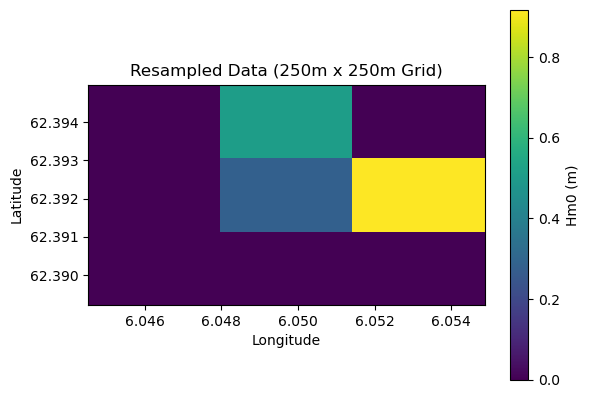

In [12]:
import netCDF4
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# 打开NetCDF文件
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 修改为你的文件路径

dataset = netCDF4.Dataset(nc_file, 'r')

# 获取经纬度数据
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]

# 假设你有某个变量需要重新网格化，比如 'Hm0'（有效波高）
original_data = dataset.variables['Hm0'][:]

# 计算新网格的维度
lat_min, lat_max = np.min(latitudes), np.max(latitudes)
lon_min, lon_max = np.min(longitudes), np.max(longitudes)

# 根据目标分辨率计算新网格的纬度和经度
new_lat_res = 250 / 111000  # 新的纬度分辨率
new_lon_res = 250 / (111000 * np.cos(np.radians(np.mean(latitudes))))  # 新的经度分辨率

# 计算新网格的经纬度范围
new_latitudes = np.arange(lat_min, lat_max, new_lat_res)
new_longitudes = np.arange(lon_min, lon_max, new_lon_res)

# 使用插值函数将数据从原始网格转换为新网格
interp_func = interpolate.interp2d(longitudes, latitudes, original_data, kind='linear', fill_value='extrapolate')
new_data = interp_func(new_longitudes, new_latitudes)

# 可视化结果
plt.imshow(new_data, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower')
plt.colorbar(label='Hm0 (m)')
plt.title('Resampled Data (250m x 250m Grid)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\86156\AppData\Local\Temp\ipykernel_23464\3540075873.py:37: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interpolate.interp2d(original_lon, original_lat, original_data, kind='linear', fill_value=np.nan)
D:\CondaEnvs\torchtmp\lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=71,67 m=4464 fp=7.70522

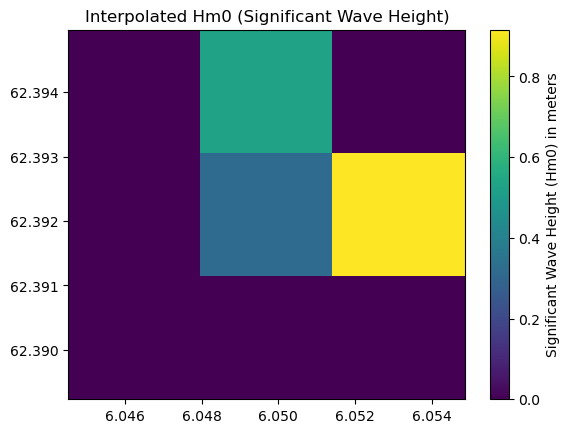

In [14]:
import numpy as np
import xarray as xr
import netCDF4
from scipy import interpolate
import matplotlib.pyplot as plt

# 打开 NetCDF 文件
# nc_file = '/path/to/your/file.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 获取原始数据
latitude = dataset.variables['latitude'][:]
longitude = dataset.variables['longitude'][:]
Hm0 = dataset.variables['Hm0'][:]
tm02 = dataset.variables['tm02'][:]
mdir = dataset.variables['mdir'][:]

# 获取原始经纬度网格
lat_min, lat_max = np.min(latitude), np.max(latitude)
lon_min, lon_max = np.min(longitude), np.max(longitude)

# 原始经纬度分辨率（假设从数据中获取）
lat_res = (lat_max - lat_min) / (len(latitude) - 1)
lon_res = (lon_max - lon_min) / (len(longitude) - 1)

# 计算目标经纬度网格（250米对应的度数）
target_lat_res = 250 / 111320  # 转换为度数 (1度大约等于 111320 米)
target_lon_res = 250 / (111320 * np.cos(np.deg2rad(np.mean(latitude))))  # 考虑经度的变化

# 生成目标经纬度网格
target_lat = np.arange(lat_min, lat_max, target_lat_res)
target_lon = np.arange(lon_min, lon_max, target_lon_res)

# 创建插值函数
def interpolate_data(original_lat, original_lon, original_data, target_lat, target_lon):
    # 使用scipy的2D插值
    interp_func = interpolate.interp2d(original_lon, original_lat, original_data, kind='linear', fill_value=np.nan)
    return interp_func(target_lon, target_lat)

# 对每个变量进行插值
Hm0_interp = interpolate_data(latitude, longitude, Hm0, target_lat, target_lon)
tm02_interp = interpolate_data(latitude, longitude, tm02, target_lat, target_lon)
mdir_interp = interpolate_data(latitude, longitude, mdir, target_lat, target_lon)

# 创建xarray DataArray，方便保存和后续操作
interp_data = xr.Dataset(
    {
        'Hm0': (['lat', 'lon'], Hm0_interp),
        'tm02': (['lat', 'lon'], tm02_interp),
        'mdir': (['lat', 'lon'], mdir_interp),
    },
    coords={
        'lat': target_lat,
        'lon': target_lon
    }
)

# 保存插值结果到新的 NetCDF 文件
interp_data.to_netcdf('E:\Dataset\met_waves\modifiedData\interpolated_data.nc')

# 可选：显示插值后的数据（例如 Hm0）
plt.imshow(Hm0_interp, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto')
plt.colorbar(label="Significant Wave Height (Hm0) in meters")
plt.title("Interpolated Hm0 (Significant Wave Height)")
plt.show()



In [16]:
import netCDF4

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\modifiedData\interpolated_data.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 查看所有变量的名称
print(dataset.variables.keys())


dict_keys(['Hm0', 'tm02', 'mdir', 'lat', 'lon'])


In [17]:
import netCDF4

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\modifiedData\interpolated_data.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 获取纬度和经度的数据
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]

# 获取纬度和经度的网格数
num_latitude = len(latitudes)
num_longitude = len(longitudes)

# 输出网格数
total_grids = num_latitude * num_longitude
print(f"Total number of grids: {total_grids} (Latitude: {num_latitude}, Longitude: {num_longitude})")


Total number of grids: 9 (Latitude: 3, Longitude: 3)


波高数据 (Hm0):
[0.60059 0.58594 0.60059 ... 0.23438 0.23438 0.24902]
波高数据的形状: (4464,)
波高数据的前几项：
[0.60059 0.58594 0.60059 0.62988 0.67383 0.67383 0.61523 0.58594 0.55664
 0.52734]


C:\Users\86156\AppData\Local\Temp\ipykernel_23464\1473322937.py:49: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolator = interpolate.interp2d(original_lon, original_lat, variable_data, kind='linear')
C:\Users\86156\AppData\Local\Temp\ipykernel_23464\1473322937.py:52: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular

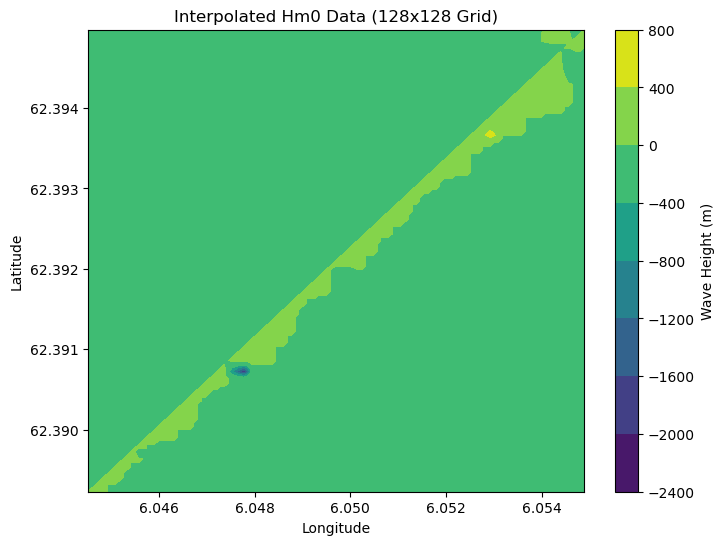

Original grid size: 4464 x 4464
Target grid size: 128 x 128
波高数据 (Hm0):
[0.60059 0.58594 0.60059 ... 0.23438 0.23438 0.24902]
波高数据的形状: (4464,)
波高数据的前几项：
[0.60059 0.58594 0.60059 0.62988 0.67383 0.67383 0.61523 0.58594 0.55664
 0.52734]


In [21]:
import netCDF4
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'
dataset = netCDF4.Dataset(nc_file, 'r')
# 获取有效波高（Hm0）数据
variable_name = 'Hm0'  # 根据实际变量名修改
wave_height = dataset.variables[variable_name][:]
# 打印波高数据
print(f"波高数据 ({variable_name}):")
print(wave_height)

# 如果数据太大，打印部分数据进行检查
print(f"波高数据的形状: {wave_height.shape}")
print(f"波高数据的前几项：")
print(wave_height[:10])  # 打印前10项
# 读取纬度和经度
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]

# 获取原始数据的维度
original_lat_size = len(latitudes)
original_lon_size = len(longitudes)

# 定义目标网格大小
target_lat_size = 128
target_lon_size = 128

# 创建目标网格
target_lat = np.linspace(latitudes.min(), latitudes.max(), target_lat_size)
target_lon = np.linspace(longitudes.min(), longitudes.max(), target_lon_size)

# 生成原始网格（这些是 1D 网格，分别表示纬度和经度）
original_lat = np.linspace(latitudes.min(), latitudes.max(), original_lat_size)
original_lon = np.linspace(longitudes.min(), longitudes.max(), original_lon_size)

# 创建网格
target_lat_grid, target_lon_grid = np.meshgrid(target_lat, target_lon)

# 插值：假设数据是单一变量，我们可以使用插值方法对其进行降采样
# 假设你要插值的变量是 Hm0（有效波高），类似的也可以应用到其他变量
variable_name = 'Hm0'  # 修改为实际的变量名
variable_data = dataset.variables[variable_name][:]

# 使用 `scipy.interpolate.interp2d` 进行双线性插值
interpolator = interpolate.interp2d(original_lon, original_lat, variable_data, kind='linear')

# 对目标网格进行插值
interpolated_data = interpolator(target_lon, target_lat)

# 可视化插值后的数据
plt.figure(figsize=(8, 6))
plt.contourf(target_lon_grid, target_lat_grid, interpolated_data, cmap='viridis')
plt.colorbar(label='Wave Height (m)')  # 根据实际数据修改
plt.title(f'Interpolated {variable_name} Data (128x128 Grid)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 输出网格大小
print(f"Original grid size: {original_lat_size} x {original_lon_size}")
print(f"Target grid size: {target_lat_size} x {target_lon_size}")
# 获取有效波高（Hm0）数据
variable_name = 'Hm0'  # 根据实际变量名修改
wave_height = dataset.variables[variable_name][:]
# 打印波高数据
print(f"波高数据 ({variable_name}):")
print(wave_height)

# 如果数据太大，打印部分数据进行检查
print(f"波高数据的形状: {wave_height.shape}")
print(f"波高数据的前几项：")
print(wave_height[:10])  # 打印前10项